### $C_l, P_{ge}, SNR+b_v$

In [1]:
import numpy as np
import Func
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from colossus.cosmology import cosmology
cosmo=cosmology.setCosmology('planck18')
h=cosmo.H0/100.
Nfrb = np.logspace(1, 9, num=17, endpoint=True, base=10.0, dtype=None)
def rgba(cc):
    return cc/255.
c1_0 = rgba(np.array([28, 110, 100,255.]))
c1 = rgba(np.array([41.,157.,143.,255.]))
c1_1 = rgba(np.array([20, 78, 71,255.]))
c2 = rgba(np.array([233.,196.,106.,255.]))
c3_0 = rgba(np.array([151, 82, 62,255.]))
c3 = rgba(np.array([216.,118.,89.,255.]))
c3_1 = rgba(np.array([108, 59, 44,255.]))
fsky = 17500./41253.

In [2]:
Nfrb[6]

10000.0

In [3]:
vsa = Func.Vs(fsky,0.6,0.9)
vsb = Func.Vs(fsky,0.3,0.6)
vsc = Func.Vs(fsky,0.,0.3)
'{:.2e}'.format(vsa),'{:.2e}'.format(vsb),'{:.2e}'.format(vsc)

('3.41e+10', '1.75e+10', '3.33e+09')

In [4]:
#nlgg_pica,nlgg_picb,nlgg_picc

#### $C_l$

In [5]:
# read data 0.75
data_folder, fig_folder = Func.paths(0.75)
ella=np.loadtxt(os.path.join(data_folder, "ell.txt"), delimiter=' ', dtype='str').astype(float)

nldd_pica = Func.nldd(300,fsky,N=Nfrb[6])
vsa = Func.Vs(fsky,0.6,0.9)
nlgg_pica = Func.nlgg(ngal=5.5e-3*h**3,fsky=fsky,V=vsa)
cldda=np.loadtxt(os.path.join(data_folder, "cldd.txt"), delimiter=' ', dtype='str').astype(float)
clgga=np.loadtxt(os.path.join(data_folder, "clgg.txt"), delimiter=' ', dtype='str').astype(float)
cldga=np.loadtxt(os.path.join(data_folder, "cldg.txt"), delimiter=' ', dtype='str').astype(float)

In [6]:
# read data 0.45
data_folder, fig_folder = Func.paths(0.45)
ellb=np.loadtxt(os.path.join(data_folder, "ell.txt"), delimiter=' ', dtype='str').astype(float)

nldd_picb = Func.nldd(300,fsky,N=Nfrb[6])
vsb = Func.Vs(fsky,0.3,0.6)
nlgg_picb = Func.nlgg(ngal=1.1e-2*h**3,fsky=fsky,V=vsb)
clddb=np.loadtxt(os.path.join(data_folder, "cldd.txt"), delimiter=' ', dtype='str').astype(float)
clggb=np.loadtxt(os.path.join(data_folder, "clgg.txt"), delimiter=' ', dtype='str').astype(float)
cldgb=np.loadtxt(os.path.join(data_folder, "cldg.txt"), delimiter=' ', dtype='str').astype(float)


In [7]:
# read data 0.15
data_folder, fig_folder = Func.paths(0.15)
ellc=np.loadtxt(os.path.join(data_folder, "ell.txt"), delimiter=' ', dtype='str').astype(float)

nldd_picc = Func.nldd(300,fsky,N=Nfrb[6])
vsc = Func.Vs(fsky,0.,0.3)
nlgg_picc = Func.nlgg(ngal=3.4e-2*h**3,fsky=fsky,V=vsc)
clddc=np.loadtxt(os.path.join(data_folder, "cldd.txt"), delimiter=' ', dtype='str').astype(float)
clggc=np.loadtxt(os.path.join(data_folder, "clgg.txt"), delimiter=' ', dtype='str').astype(float)
cldgc=np.loadtxt(os.path.join(data_folder, "cldg.txt"), delimiter=' ', dtype='str').astype(float)

In [ ]:
nlgg_picc,nlgg_picb,nlgg_pica

(1.5208240056683786e-07, 8.929290929375586e-08, 9.166359260761582e-08)

: 

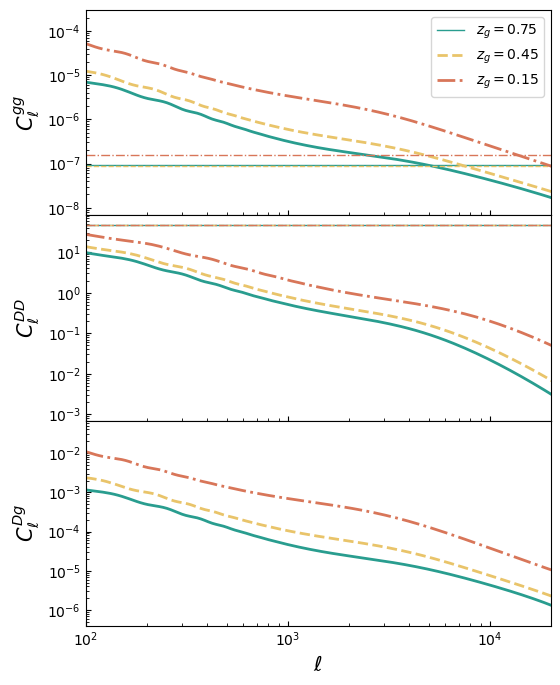

In [10]:
# c1=0.75
# plot
fig,ax = plt.subplots(3,1,figsize=(6,8),sharex = "all")
fig.subplots_adjust(hspace = 0)

ax[0].axhline(nlgg_pica,linewidth=1, c=c1,label=r'$z_g=0.75$')
ax[0].plot(ella, clgga,linewidth=2, color=c1)
ax[0].plot(ella, clggb,linewidth=2, color=c2, linestyle='--',label=r'$z_g=0.45$')
ax[0].axhline(nlgg_picb,linestyle='--',linewidth=1, c=c2)
ax[0].plot(ella, clggc,linewidth=2, color=c3, linestyle='-.', label=r'$z_g=0.15$')
ax[0].axhline(nlgg_picc,linestyle='-.',linewidth=1, c=c3)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend(fontsize=10)
ax[0].set_ylabel(r'$C_\ell^{gg}$',fontsize=15)
ax[0].tick_params(which='both',direction='in')

ax[1].plot(ella, cldda, linewidth=2, color=c1)
ax[1].axhline(nldd_pica,linewidth=1, c = c1)
ax[1].plot(ella, clddb, linewidth=2, color=c2, linestyle='--')
ax[1].axhline(nldd_picb,linestyle='--',linewidth=1,c = c2)
ax[1].plot(ella, clddc, linewidth=2, color=c3, linestyle='-.')
ax[1].axhline(nldd_picc,linestyle='-.',linewidth=1,c = c3)
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$C_\ell^{DD}$',fontsize=15)
ax[1].tick_params(which='both',direction='in')
#ax[0].set_yticks(minor=True)

ax[2].plot(ella, cldga,linewidth=2, color=c1)
ax[2].plot(ella, cldgb,linewidth=2, color=c2, linestyle='--')
ax[2].plot(ella, cldgc,linewidth=2, color=c3, linestyle='-.')
ax[2].set_yscale('log')
ax[2].set_ylabel(r'$C_\ell^{Dg}$',fontsize=15)
ax[2].tick_params(which='both',direction='in')
ax[2].set_xlim(1e+2,2e+4)
ax[2].set_xlabel(r'$\ell$',fontsize=15)



pdf_path = os.path.join('/home/wangsy2/get_prior/finalv4/figure', 'cl_thesis.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

#### $P_{ge}$

In [2]:
import hmvec as hm
from Main import Analysis

zs = np.linspace(0.,1.,101)
ms = np.geomspace(2e10,1e17,200)

def get_pgv(zg):
    """
    large scale
    """
    v = Func.Vs(fsky, zg-0.15, zg+0.15)
    kmin = Func.get_kmin(v)
    kmax = 10.
    kl = np.geomspace(1e-4,kmin,200)   # /Mpc
    ks = np.geomspace(kmin,10.,200)

    bg = Func.biasg(zg)
    hcos = hm.HaloModel(zs,kl,ms=ms)

    index = np.where(zs==zg)[0].astype(int)
    pmm_1h = hcos.get_power_1halo(name="nfw")[index,:][0,:]
    pmm_2h = hcos.get_power_2halo(name="nfw")[index,:][0,:]
    pmm = pmm_1h+pmm_2h

    f = Func.growthrate(Om0=cosmo.Om0,z=zg)
    a = 1./(1.+zg)
    H = cosmo.Hz(zg)
    speed = 3e+5

    def interg_mu(kl_int,pmm_int):
        mu_int = np.linspace(-1.,1.,50)
        pgv_int = f*a*H/kl_int*(bg+f*mu_int**2)*pmm_int/speed
        pgv1 = np.trapz(pgv_int, mu_int)
        return pgv1

    pgv = np.zeros(len(kl))
    for i in range(len(kl)):
        pgv[i] = interg_mu(kl[i], pmm[i])
    return pgv

def get_pgg(zg,ngal):
    """
    large scale
    """
    v = Func.Vs(fsky, zg-0.15, zg+0.15)
    kmin = Func.get_kmin(v)
    kmax = 10.
    kl = np.geomspace(1e-4,kmin,200)   # /Mpc

    hcos1 = hm.HaloModel(zs,kl,ms=ms)
    hcos1.add_hod("g",ngal= ngal+ zs*0.,corr="max")

    index = np.where(zs==0.75)[0].astype(int)
    pgg_1h = hcos1.get_power_1halo(name="g")[index,:][0,:]
    pgg_2h = hcos1.get_power_2halo(name="g")[index,:][0,:]
    pgg = pgg_1h + pgg_2h

    pgg_tot = pgg+1./ngal
    return pgg_tot


def pge_err_cmb(ksint, pggint, clint):
    """
    small scale
    """
    dksint = np.diff(ksint)
    result=0
    for i in range(len(ksint)-1):
        result = result+ksint[i]*dksint[i]/pggint[i]/clint[i]
    return result

def get_pge_err_cmb(zg, pge):
    """
    small scale
    """
    ksbin_num = 25
    v = Func.Vs(fsky, zg-0.15, zg+0.15)
    kmin = Func.get_kmin(v)
    kmax = 10.
    ks = np.geomspace(kmin,10.,200)

    ks_int = ks.reshape((ksbin_num, int(len(ks)/ksbin_num)))
    pge_y = pge.reshape((ksbin_num, int(len(ks)/ksbin_num)))
    pgg_int = pgg.reshape((ksbin_num, int(len(ks)/ksbin_num)))
    cltt_int = cltt.reshape((ksbin_num, int(len(ks)/ksbin_num)))
    dpge_cmb = np.zeros(ksbin_num)
    for i in range(ksbin_num):
        dpge_cmb[i] = pge_err_cmb(ksint=ks_int[i,:],pggint=pgg_int[i,:],clint=cltt_int[i,:])
    return (err_pgekl * dpge_cmb * v * kg**2 /12./np.pi**3 / chig**2)**(-0.5)

In [6]:
zg = 0.75
ngal = 5.5e-3*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)
# load data
data_folder, fig_folder = Func.paths(zg)
kka1=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea1=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea1=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)
# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)
# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h
# last
dpge_cmb1 = get_pge_err_cmb(zg, pgea1)
# plot
plt.clf()
kbin_num = 25
pge_ya1 = pgea1.reshape((kbin_num, int(len(kka1)/kbin_num)))
k_inta1 = kka1.reshape((kbin_num, int(len(kka1)/kbin_num)))

zg = 0.45
ngal = 5.5e-3*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)
# load data
data_folder, fig_folder = Func.paths(zg)
kka2=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea2=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea2=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)
# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)
# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h
# last
dpge_cmb2 = get_pge_err_cmb(zg, pgea2)
# plot
kbin_num = 25
pge_ya2 = pgea2.reshape((kbin_num, int(len(kka2)/kbin_num)))
k_inta2 = kka2.reshape((kbin_num, int(len(kka2)/kbin_num)))

zg = 0.15
ngal = 5.5e-3*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)
# load data
data_folder, fig_folder = Func.paths(zg)
kka3=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea3=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea3=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)
# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)
# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h
# last
dpge_cmb3 = get_pge_err_cmb(zg, pgea3)
# plot
kbin_num = 25
pge_ya3 = pgea3.reshape((kbin_num, int(len(kka3)/kbin_num)))
k_inta3 = kka3.reshape((kbin_num, int(len(kka3)/kbin_num)))


Bisection search converged in  18  iterations.


/home/wangsy2/anaconda3/envs/mcmc1/lib/python3.12/site-packages/hmvec/hmvec.py:737: RuntimeWarning: invalid value encountered in divide
  ret = Ns**2./Nc


Bisection search converged in  18  iterations.
Bisection search converged in  18  iterations.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

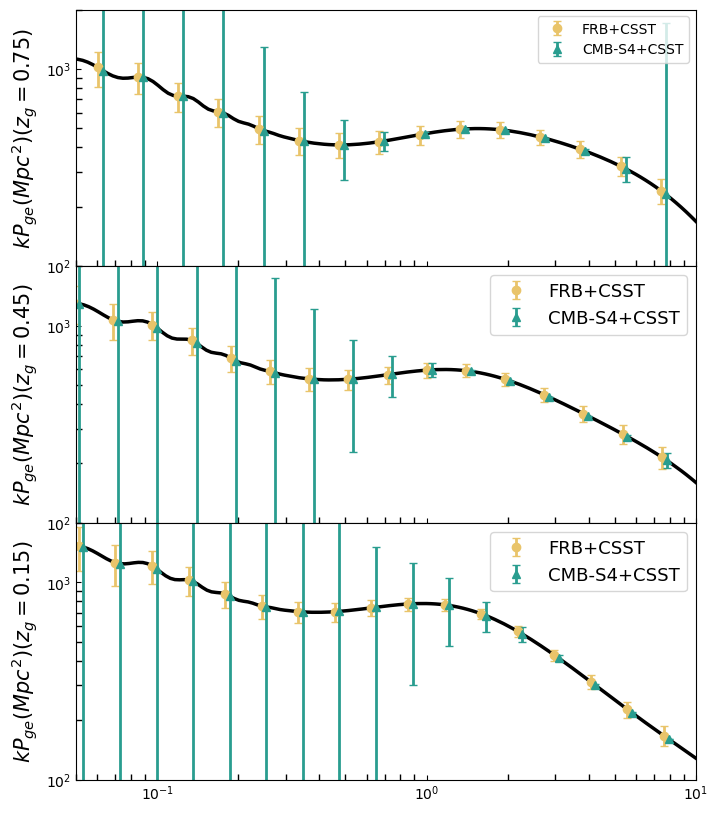

In [10]:


plt.clf()
fig,ax = plt.subplots(3,1,figsize=(8,10),sharex = "all")
fig.subplots_adjust(hspace = 0)

ax[0].loglog(kka1, kka1*pgea1, color='k', linewidth=2.5)
ax[0].errorbar(k_inta1[:,0],k_inta1[:,0]*pge_ya1[:,0],yerr=k_inta1[:,0]*dpgea1, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
ax[0].errorbar(k_inta1[:,1],k_inta1[:,1]*pge_ya1[:,1],yerr=k_inta1[:,1]*dpge_cmb1, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
ax[0].legend(prop = {'size':13},loc='upper right')
ax[0].set_ylabel(r'$kP_{ge}(Mpc^2)(z_g=0.75)$',fontsize=15)
ax[0].set_ylim([1e+2,2e+3])
ax[0].set_xlim([5e-2,1e+1])
ax[0].tick_params(which='both',direction='in')
ax[0].minorticks_on()
ax[0].tick_params(which='minor', direction='in', length=4, width=1)
ax[0].legend(loc='upper right')

ax[1].loglog(kka2, kka2*pgea2, color='k', linewidth=2.5)
ax[1].errorbar(k_inta2[:,0],k_inta2[:,0]*pge_ya2[:,0],yerr=k_inta2[:,0]*dpgea2, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
ax[1].errorbar(k_inta2[:,1],k_inta2[:,1]*pge_ya2[:,1],yerr=k_inta2[:,1]*dpge_cmb2, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
ax[1].legend(prop = {'size':13},loc='upper right')
ax[1].set_ylabel(r'$kP_{ge}(Mpc^2)(z_g=0.45)$',fontsize=15)
ax[1].set_ylim([1e+2,2e+3])
ax[1].set_xlim([5e-2,1e+1])
ax[1].tick_params(which='both',direction='in')
ax[1].minorticks_on()
ax[1].tick_params(which='minor', direction='in', length=4, width=1)
#ax[1].legend(loc='lower right')

ax[2].loglog(kka3, kka3*pgea3, color='k', linewidth=2.5)
ax[2].errorbar(k_inta3[:,0],k_inta3[:,0]*pge_ya3[:,0],yerr=k_inta3[:,0]*dpgea3, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
ax[2].errorbar(k_inta3[:,1],k_inta3[:,1]*pge_ya3[:,1],yerr=k_inta3[:,1]*dpge_cmb3, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
ax[2].legend(prop = {'size':13},loc='upper right')
ax[2].set_ylabel(r'$kP_{ge}(Mpc^2)(z_g=0.15)$',fontsize=15)
ax[2].set_ylim([1e+2,2e+3])
ax[2].set_xlim([5e-2,1e+1])
ax[2].tick_params(which='both',direction='in')
ax[2].minorticks_on()
ax[2].tick_params(which='minor', direction='in', length=4, width=1)
#ax[2].legend(loc='upper right')

pdf_path = os.path.join('/home/wangsy2/get_prior/finalv4/figure', 'pge_thesis.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

Bisection search converged in  18  iterations.


/home/wangsy/.local/lib/python3.9/site-packages/hmvec/hmvec.py:737: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


<Figure size 640x480 with 0 Axes>

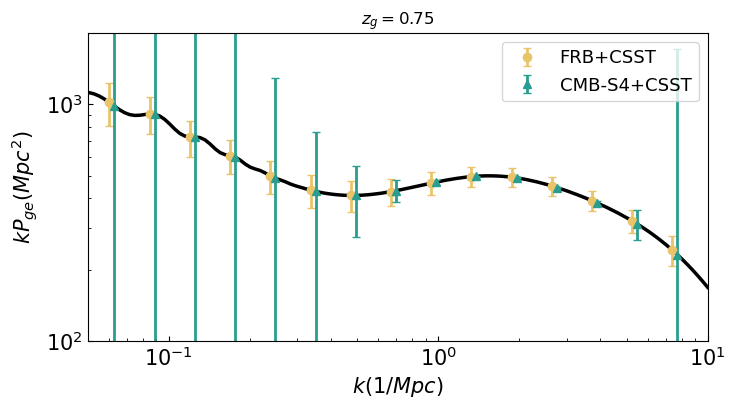

In [33]:
zg = 0.75
ngal = 5.5e-3*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)

# load data
data_folder, fig_folder = Func.paths(zg)
kka=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)

# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)

# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h

# last
dpge_cmb1 = get_pge_err_cmb(zg, pgea)

# plot
plt.clf()
kbin_num = 25
pge_ya = pgea.reshape((kbin_num, int(len(kka)/kbin_num)))
k_inta = kka.reshape((kbin_num, int(len(kka)/kbin_num)))
plt.figure(figsize=(8, 4))
plt.loglog(kka, kka*pgea, color='k', linewidth=2.5)
plt.errorbar(k_inta[:,0],k_inta[:,0]*pge_ya[:,0],yerr=k_inta[:,0]*dpgea, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
plt.errorbar(k_inta[:,1],k_inta[:,1]*pge_ya[:,1],yerr=k_inta[:,1]*dpge_cmb1, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
plt.legend(prop = {'size':13},loc='upper right')
plt.ylabel(r'$kP_{ge}(Mpc^2)$',fontsize=15)
plt.xlabel(r'$k(1/Mpc)$',fontsize=15)
plt.ylim([1e+2,2e+3])
plt.xlim([5e-2,1e+1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r"$z_g=0.75$")
plt.tick_params(which='both',direction='in')

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'pge75.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

Bisection search converged in  18  iterations.


/home/wangsy/.local/lib/python3.9/site-packages/hmvec/hmvec.py:737: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


<Figure size 640x480 with 0 Axes>

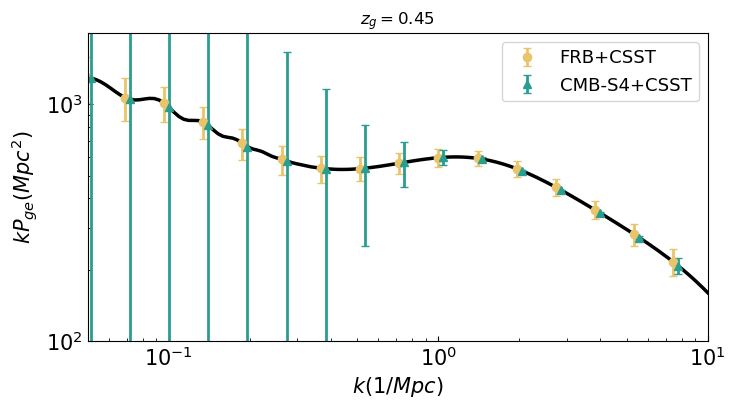

In [34]:
zg = 0.45
ngal = 1.1e-2*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)

# load data
data_folder, fig_folder = Func.paths(zg)
kka=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)

# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)

# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h

# last
dpge_cmb1 = get_pge_err_cmb(zg, pgea)

# plot
plt.clf()
plt.figure(figsize=(8, 4))
kbin_num = 25
pge_ya = pgea.reshape((kbin_num, int(len(kka)/kbin_num)))
k_inta = kka.reshape((kbin_num, int(len(kka)/kbin_num)))
plt.loglog(kka, kka*pgea, color='k', linewidth=2.5)
plt.errorbar(k_inta[:,0],k_inta[:,0]*pge_ya[:,0],yerr=k_inta[:,0]*dpgea, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
plt.errorbar(k_inta[:,1],k_inta[:,1]*pge_ya[:,1],yerr=k_inta[:,1]*dpge_cmb1, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
plt.legend(prop = {'size':13})
plt.ylabel(r'$kP_{ge}(Mpc^2)$',fontsize=15)
plt.xlabel(r'$k(1/Mpc)$',fontsize=15)
plt.ylim([1e+2,2e+3])
plt.xlim([5e-2,1e+1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r"$z_g=0.45$")
plt.tick_params(which='both',direction='in')


pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'pge45.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

Bisection search converged in  17  iterations.


/home/wangsy/.local/lib/python3.9/site-packages/hmvec/hmvec.py:737: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


<Figure size 640x480 with 0 Axes>

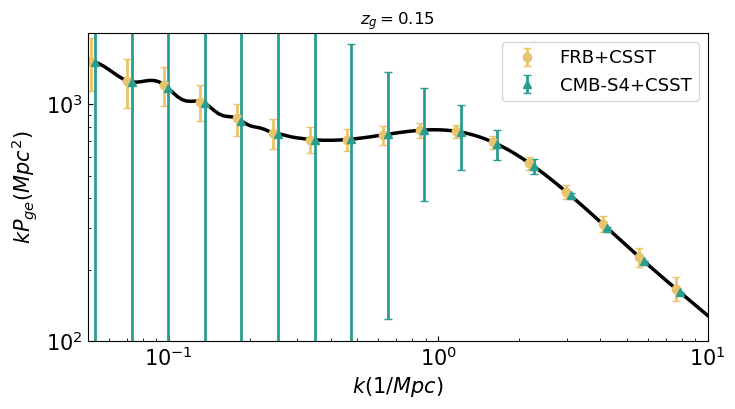

In [35]:
zg = 0.15
ngal = 3.4e-2*h**3
v = Func.Vs(fsky, zg-0.15, zg+0.15)
kmin = Func.get_kmin(v)
kmax = 10.
kl = np.geomspace(1e-4,kmin,200)   # /Mpc
ks = np.geomspace(kmin,10.,200)

# load data
data_folder, fig_folder = Func.paths(zg)
kka=np.loadtxt(os.path.join(data_folder, "kk.txt"), delimiter=' ', dtype='str').astype(float)
dpgea=np.loadtxt(os.path.join(data_folder, "dpge.txt"), delimiter=' ', dtype='str').astype(float)
pgea=np.loadtxt(os.path.join(data_folder, "pge.txt"), delimiter=' ', dtype='str').astype(float)
pgg = np.loadtxt(os.path.join(data_folder, "pgg.txt"), delimiter=' ', dtype='str').astype(float)

# large scale
pgv = get_pgv(zg)
pgg_tot = get_pgg(zg,ngal)
err_pgekl = np.trapz(kl**2*pgv**2/pgg_tot, kl)

# small scale
analysis = Analysis(fsky, zg, 0.15, ngal,clt_beam=1.5, clt_RMS=1.8, small_scale=False)
kg = analysis.ksz_radial_function()
cltt = analysis.clT_tot()
chig = cosmo.comovingDistance(0,zg)/h

# last
dpge_cmb1 = get_pge_err_cmb(zg, pgea)

# plot
plt.clf()
kbin_num = 25
plt.figure(figsize=(8, 4))
pge_ya = pgea.reshape((kbin_num, int(len(kka)/kbin_num)))
k_inta = kka.reshape((kbin_num, int(len(kka)/kbin_num)))
plt.loglog(kka, kka*pgea, color='k', linewidth=2.5)
plt.errorbar(k_inta[:,0],k_inta[:,0]*pge_ya[:,0],yerr=k_inta[:,0]*dpgea, fmt='o',capsize=3, elinewidth=2, color=c2, label='FRB+CSST')
plt.errorbar(k_inta[:,1],k_inta[:,1]*pge_ya[:,1],yerr=k_inta[:,1]*dpge_cmb1, fmt='^',capsize=3, elinewidth=2, color=c1,label='CMB-S4+CSST')
plt.legend(prop = {'size':13})
plt.ylabel(r'$kP_{ge}(Mpc^2)$',fontsize=15)
plt.xlabel(r'$k(1/Mpc)$',fontsize=15)
plt.ylim([1e+2,2e+3])
plt.xlim([5e-2,1e+1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r"$z_g=0.15$")
plt.tick_params(which='both',direction='in')


pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'pge15.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

#### $SNR+b_v$

In [7]:
data_folder = os.path.join('/home/wangsy2/get_prior/finalv4', 'z75', 'data')
bv100a = np.loadtxt(os.path.join(data_folder, "bv100.txt"), delimiter=' ', dtype='str').astype(float)
bv300a = np.loadtxt(os.path.join(data_folder, "bv300.txt"), delimiter=' ', dtype='str').astype(float)
bv1000a = np.loadtxt(os.path.join(data_folder, "bv1000.txt"), delimiter=' ', dtype='str').astype(float)
snr100a=np.loadtxt(os.path.join(data_folder, "snr100.txt"), delimiter=' ', dtype='str').astype(float)
snr300a=np.loadtxt(os.path.join(data_folder, "snr300.txt"), delimiter=' ', dtype='str').astype(float)
snr1000a=np.loadtxt(os.path.join(data_folder, "snr1000.txt"), delimiter=' ', dtype='str').astype(float)


data_folder = os.path.join('/home/wangsy2/get_prior/finalv4', 'z45', 'data')
bv100b = np.loadtxt(os.path.join(data_folder, "bv100.txt"), delimiter=' ', dtype='str').astype(float)
bv300b = np.loadtxt(os.path.join(data_folder, "bv300.txt"), delimiter=' ', dtype='str').astype(float)
bv1000b = np.loadtxt(os.path.join(data_folder, "bv1000.txt"), delimiter=' ', dtype='str').astype(float)
snr100b=np.loadtxt(os.path.join(data_folder, "snr100.txt"), delimiter=' ', dtype='str').astype(float)
snr300b=np.loadtxt(os.path.join(data_folder, "snr300.txt"), delimiter=' ', dtype='str').astype(float)
snr1000b=np.loadtxt(os.path.join(data_folder, "snr1000.txt"), delimiter=' ', dtype='str').astype(float)

data_folder = os.path.join('/home/wangsy2/get_prior/finalv4', 'z15', 'data')
bv100c = np.loadtxt(os.path.join(data_folder, "bv100.txt"), delimiter=' ', dtype='str').astype(float)
bv300c = np.loadtxt(os.path.join(data_folder, "bv300.txt"), delimiter=' ', dtype='str').astype(float)
bv1000c = np.loadtxt(os.path.join(data_folder, "bv1000.txt"), delimiter=' ', dtype='str').astype(float)
snr100c=np.loadtxt(os.path.join(data_folder, "snr100.txt"), delimiter=' ', dtype='str').astype(float)
snr300c=np.loadtxt(os.path.join(data_folder, "snr300.txt"), delimiter=' ', dtype='str').astype(float)
snr1000c=np.loadtxt(os.path.join(data_folder, "snr1000.txt"), delimiter=' ', dtype='str').astype(float)

<Figure size 640x480 with 0 Axes>

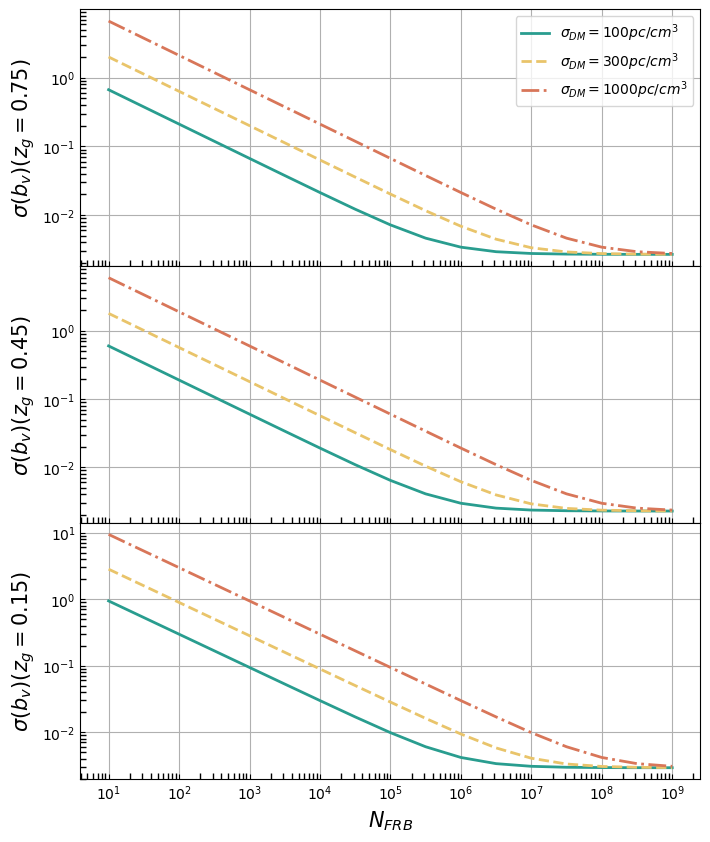

In [13]:
plt.clf()
fig,ax = plt.subplots(3,1,figsize=(8,10),sharex = "all")
fig.subplots_adjust(hspace = 0)

ax[0].loglog(Nfrb, bv100a,color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[0].loglog(Nfrb, bv300a,color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[0].loglog(Nfrb, bv1000a,color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[0].set_xlabel(r'$N_{FRB}$',size=15)
ax[0].set_ylabel(r'$\sigma(b_v)(z_g=0.75)$', size=15)
#ax[0].set_ylim([1e-1,1e+3])
ax[0].tick_params(which='both',direction='in')
ax[0].minorticks_on()
ax[0].tick_params(which='minor', direction='in', length=4, width=1)
ax[0].legend(loc='upper right')
ax[0].grid(True)

ax[1].loglog(Nfrb, bv100b,color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[1].loglog(Nfrb, bv300b,color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[1].loglog(Nfrb, bv1000b,color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[1].set_xlabel(r'$N_{FRB}$',size=15)
ax[1].set_ylabel(r'$\sigma(b_v)(z_g=0.45)$', size=15)
ax[1].tick_params(which='both',direction='in')
ax[1].minorticks_on()
ax[1].tick_params(which='minor', direction='in', length=4, width=1)
#ax[1].legend(loc='lower right')
ax[1].grid(True)

ax[2].loglog(Nfrb, bv100c,color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[2].loglog(Nfrb, bv300c,color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[2].loglog(Nfrb, bv1000c,color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[2].set_xlabel(r'$N_{FRB}$',size=15)
ax[2].set_ylabel(r'$\sigma(b_v)(z_g=0.15)$', size=15)
ax[2].tick_params(which='both',direction='in')
ax[2].minorticks_on()
ax[2].tick_params(which='minor', direction='in', length=4, width=1)
#ax[2].legend(loc='upper right')
ax[2].grid(True)

pdf_path = os.path.join('/home/wangsy2/get_prior/finalv4/figure', 'bv_thesis.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

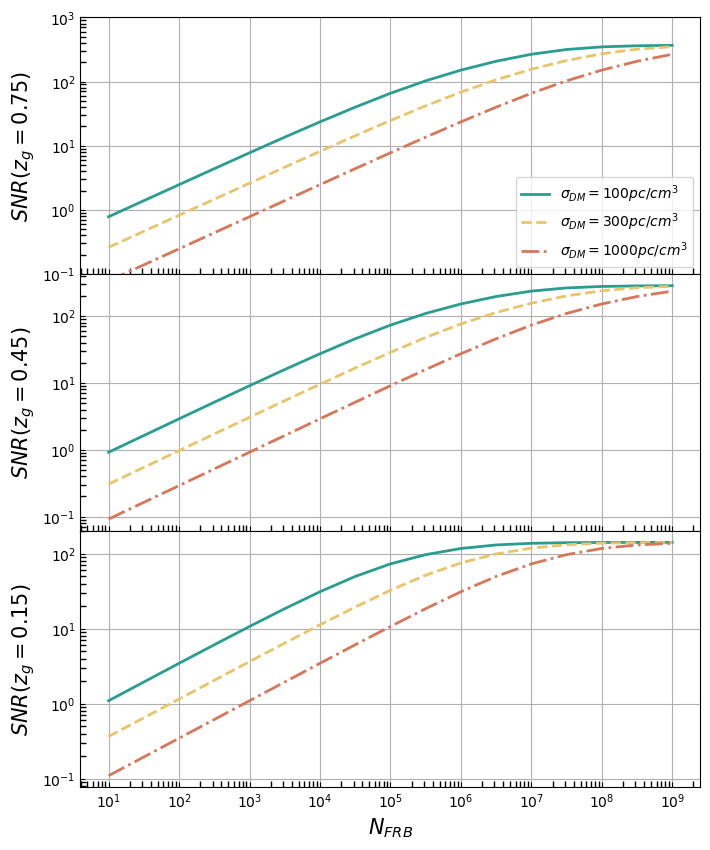

In [10]:
plt.clf()
fig,ax = plt.subplots(3,1,figsize=(8,10),sharex = "all")
fig.subplots_adjust(hspace = 0)

ax[0].loglog(Nfrb, np.sqrt(snr100a),color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[0].loglog(Nfrb, np.sqrt(snr300a),color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[0].loglog(Nfrb, np.sqrt(snr1000a),color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[0].set_xlabel(r'$N_{FRB}$',size=15)
ax[0].set_ylabel(r'$SNR(z_g=0.75)$', size=15)
ax[0].set_ylim([1e-1,1e+3])
ax[0].tick_params(which='both',direction='in')
ax[0].minorticks_on()
ax[0].tick_params(which='minor', direction='in', length=4, width=1)
ax[0].legend(loc='lower right')
ax[0].grid(True)

ax[1].loglog(Nfrb, np.sqrt(snr100b),color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[1].loglog(Nfrb, np.sqrt(snr300b),color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[1].loglog(Nfrb, np.sqrt(snr1000b),color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[1].set_xlabel(r'$N_{FRB}$',size=15)
ax[1].set_ylabel(r'$SNR(z_g=0.45)$', size=15)
ax[1].tick_params(which='both',direction='in')
ax[1].minorticks_on()
ax[1].tick_params(which='minor', direction='in', length=4, width=1)
#ax[1].legend(loc='lower right')
ax[1].grid(True)

ax[2].loglog(Nfrb, np.sqrt(snr100c),color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax[2].loglog(Nfrb, np.sqrt(snr300c),color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax[2].loglog(Nfrb, np.sqrt(snr1000c),color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax[2].set_xlabel(r'$N_{FRB}$',size=15)
ax[2].set_ylabel(r'$SNR(z_g=0.15)$', size=15)
ax[2].tick_params(which='both',direction='in')
ax[2].minorticks_on()
ax[2].tick_params(which='minor', direction='in', length=4, width=1)
#ax[2].legend(loc='lower right')
ax[2].grid(True)

pdf_path = os.path.join('/home/wangsy2/get_prior/finalv4/figure', 'snr_thesis.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

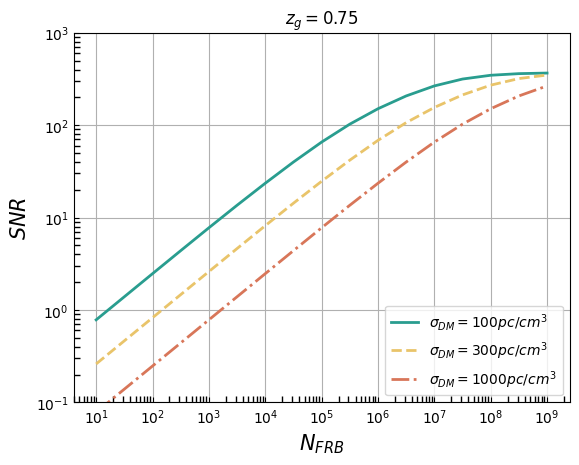

In [4]:
plt.clf()
fig, ax1 = plt.subplots()

# 绘制第一个 Y 轴的曲线（左侧 Y 轴）
ax1.loglog(Nfrb, np.sqrt(snr100a),color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr300a),color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr1000a),color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax1.set_xlabel(r'$N_{FRB}$',size=15)
ax1.set_ylabel(r'$SNR$', size=15)
ax1.set_ylim([1e-1,1e+3])
ax1.tick_params(which='both',direction='in')

# 启用 x 轴的副刻度线
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='in', length=4, width=1)

# 添加标题和图例
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_title(r'$z_g=0.75$')

locator = ticker.LogLocator(base=10)
ax1.xaxis.set_major_locator(locator)

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'snr75.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

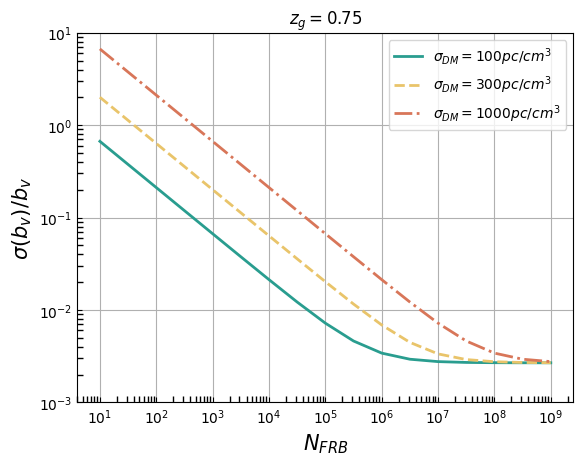

In [3]:
plt.clf()
fig, ax1 = plt.subplots()

# 绘制第一个 Y 轴的曲线（左侧 Y 轴）
ax1.loglog(Nfrb, bv100a,color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax1.loglog(Nfrb, bv300a,color=c2, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax1.loglog(Nfrb, bv1000a,color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax1.set_xlabel(r'$N_{FRB}$',size=15)
ax1.set_ylabel(r'$\sigma(b_v)/b_v$', size=15)
ax1.set_ylim([1e-3,1e+1])
ax1.tick_params(which='both',direction='in')

# 启用 x 轴的副刻度线
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='in', length=4, width=1)

# 添加标题和图例
ax1.legend(loc='upper right')
ax1.grid(True)
ax1.set_title(r'$z_g=0.75$')

locator = ticker.LogLocator(base=10)
ax1.xaxis.set_major_locator(locator)

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'bv75.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

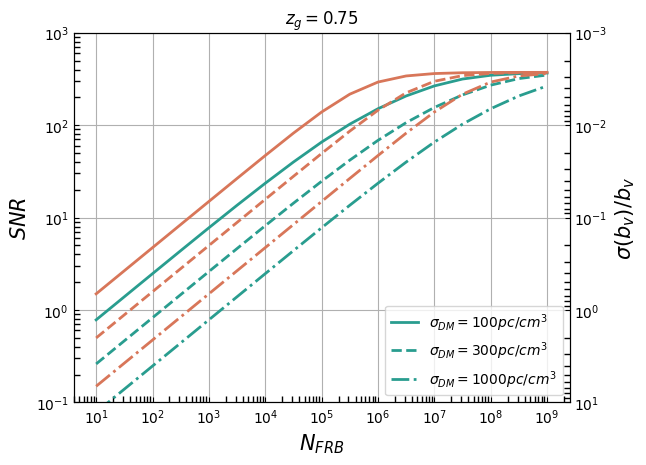

In [3]:
# 创建图表 0.75
plt.clf()
fig, ax1 = plt.subplots()

# 绘制第一个 Y 轴的曲线（左侧 Y 轴）
ax1.loglog(Nfrb, np.sqrt(snr100a),color=c1, linewidth=2.0 ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr300a),color=c1, linewidth=2.0, linestyle='--' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr1000a),color=c1, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax1.set_xlabel(r'$N_{FRB}$',size=15)
ax1.set_ylabel(r'$SNR$', size=15)
ax1.set_ylim([1e-1,1e+3])
ax1.tick_params(which='both',direction='in')

# 启用 x 轴的副刻度线
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='in', length=4, width=1)

# 创建第二个 Y 轴，并绘制曲线（右侧 Y 轴）
ax2 = ax1.twinx()
ax2.loglog(Nfrb, bv100a,color=c3, linewidth=2.0,  label=r'$\sigma_{DM}=100 pc/cm^3$')
ax2.loglog(Nfrb, bv300a,color=c3, linewidth=2.0, linestyle='--',label=r'$\sigma_{DM}=300 pc/cm^3$')
ax2.loglog(Nfrb, bv1000a,color=c3, linewidth=2.0, linestyle='-.',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax2.set_ylabel(r'$\sigma(b_v)/b_v $', size=15)
ax2.tick_params(axis='y', labelsize=10, direction='inout')
ax2.set_ylim([1e-3,1e+1])
ax2.set_ylim(1e+1,1e-3)
ax2.tick_params(which='both',direction='in')

# 启用右侧 y 轴的副刻度线
ax2.minorticks_on()
ax2.tick_params(which='minor', direction='in', length=4, width=1)

# 添加标题和图例
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_title(r'$z_g=0.75$')

locator = ticker.LogLocator(base=10)
ax1.xaxis.set_major_locator(locator)

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'snrbv75.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

In [ ]:
# 创建图表 0.45
plt.clf()
fig, ax1 = plt.subplots()

# 绘制第一个 Y 轴的曲线（左侧 Y 轴）
ax1.loglog(Nfrb, np.sqrt(snr100b),color=c1, linewidth=2.0,  linestyle='-' ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr300b),color=c2, linewidth=2.0, linestyle='-' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr1000b),color=c3, linewidth=2.0, linestyle='-',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax1.set_xlabel(r'$N_{FRB}$',size=15)
ax1.set_ylabel(r'$SNR$', size=15)
ax1.set_ylim([1e-1,1e+3])

# 创建第二个 Y 轴，并绘制曲线（右侧 Y 轴）
ax2 = ax1.twinx()
ax2.loglog(Nfrb, bv100b,color=c1, linewidth=2.0,  linestyle='--',label=r'$\sigma_{DM}=100 pc/cm^3$')
ax2.loglog(Nfrb, bv300b,color=c2, linewidth=2.0, linestyle='--',label=r'$\sigma_{DM}=300 pc/cm^3$')
ax2.loglog(Nfrb, bv1000b,color=c3, linewidth=2.0, linestyle='--',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax2.set_ylabel(r'$\sigma(b_v)/b_v $', size=15)
ax2.tick_params(axis='y', labelsize=10, direction='inout')
ax2.set_ylim([1e-3,1e+1])
ax2.set_ylim(1e+1,1e-3)

# 添加标题和图例
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_title(r'$z_g=0.45$')

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'snrbv45.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

In [ ]:
# 创建图表 0.15
fig, ax1 = plt.subplots()

# 绘制第一个 Y 轴的曲线（左侧 Y 轴）
ax1.loglog(Nfrb, np.sqrt(snr100c),color=c1, linewidth=2.0,  linestyle='-' ,label=r'$\sigma_{DM}=100 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr300c),color=c2, linewidth=2.0, linestyle='-' ,label=r'$\sigma_{DM}=300 pc/cm^3$')
ax1.loglog(Nfrb, np.sqrt(snr1000c),color=c3, linewidth=2.0, linestyle='-',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax1.set_xlabel(r'$N_{FRB}$',size=15)
ax1.set_ylabel(r'$SNR$', size=15)
ax1.set_ylim([1e-1,1e+3])

# 创建第二个 Y 轴，并绘制曲线（右侧 Y 轴）
ax2 = ax1.twinx()
ax2.loglog(Nfrb, bv100c,color=c1, linewidth=2.0,  linestyle='--',label=r'$\sigma_{DM}=100 pc/cm^3$')
ax2.loglog(Nfrb, bv300c,color=c2, linewidth=2.0, linestyle='--',label=r'$\sigma_{DM}=300 pc/cm^3$')
ax2.loglog(Nfrb, bv1000c,color=c3, linewidth=2.0, linestyle='--',label=r'$\sigma_{DM}=1000 pc/cm^3$') 
ax2.set_ylabel(r'$\sigma(b_v)/b_v $', size=15)
ax2.tick_params(axis='y', labelsize=10, direction='inout')
ax2.set_ylim([1e-3,1e+1])
ax2.set_ylim(1e+1,1e-3)

# 添加标题和图例
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_title(r'$z_g=0.15$')

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'snrbv15.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

#### $fs8$

In [3]:
data_folder = os.path.join('/home/wangsy/get_prior/finalv4', 'z75', 'data')
ksz_tomog100a = np.loadtxt(os.path.join(data_folder, "ksz_tomog100.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD100a = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD100.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog300a = np.loadtxt(os.path.join(data_folder, "ksz_tomog300.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD300a = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD300.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog1000a = np.loadtxt(os.path.join(data_folder, "ksz_tomog1000.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD1000a = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD1000.txt"), delimiter=' ', dtype='str').astype(float)
err_rsda = 0.00801293154199452

data_folder = os.path.join('/home/wangsy/get_prior/finalv4', 'z45', 'data')
ksz_tomog100b = np.loadtxt(os.path.join(data_folder, "ksz_tomog100.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD100b = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD100.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog300b = np.loadtxt(os.path.join(data_folder, "ksz_tomog300.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD300b = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD300.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog1000b = np.loadtxt(os.path.join(data_folder, "ksz_tomog1000.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD1000b = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD1000.txt"), delimiter=' ', dtype='str').astype(float)
err_rsdb = 0.013120288894571081

data_folder = os.path.join('/home/wangsy/get_prior/finalv4', 'z15', 'data')
ksz_tomog100c = np.loadtxt(os.path.join(data_folder, "ksz_tomog100.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD100c = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD100.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog300c = np.loadtxt(os.path.join(data_folder, "ksz_tomog300.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD300c = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD300.txt"), delimiter=' ', dtype='str').astype(float)
ksz_tomog1000c = np.loadtxt(os.path.join(data_folder, "ksz_tomog1000.txt"), delimiter=' ', dtype='str').astype(float)
ksztomog_RSD1000c = np.loadtxt(os.path.join(data_folder, "ksztomog_RSD1000.txt"), delimiter=' ', dtype='str').astype(float)
err_rsdc = 0.037622781639503125

<Figure size 640x480 with 0 Axes>

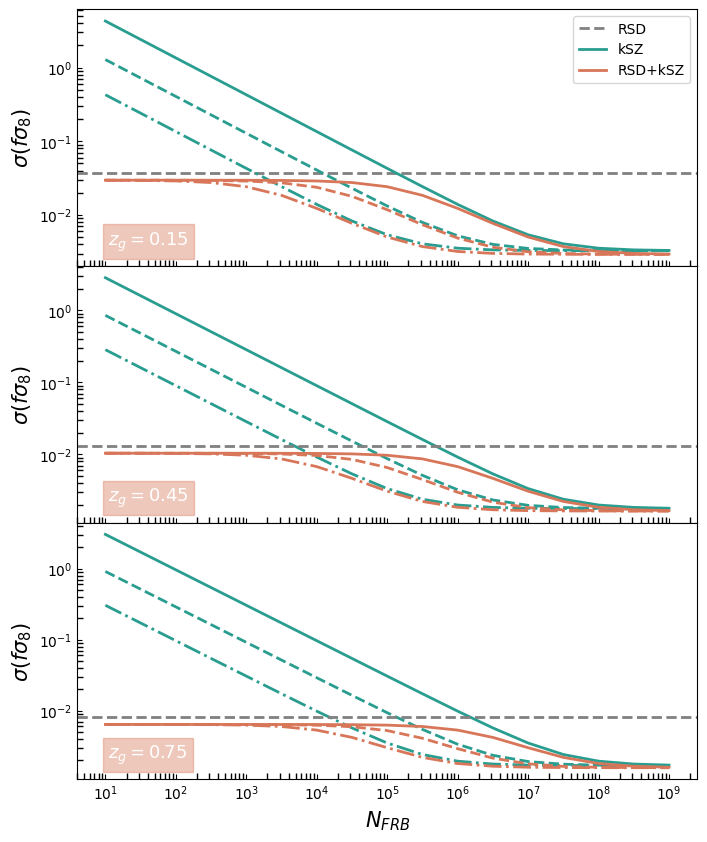

In [4]:
plt.clf()
fig,ax = plt.subplots(3,1,figsize=(8,10),sharex = "all")
fig.subplots_adjust(hspace = 0)

ax[0].axhline(y=err_rsdc,label='RSD',c='grey', linestyle='--',linewidth=2.0)
ax[0].plot(Nfrb,ksz_tomog100c,c=c1,linestyle='-.',linewidth=2.0)
ax[0].plot(Nfrb,ksz_tomog300c,c=c1,linestyle='--',linewidth=2.0)
ax[0].plot(Nfrb,ksz_tomog1000c,c=c1,linestyle='-',label='kSZ',linewidth=2.0)
ax[0].plot(Nfrb,ksztomog_RSD100c,c=c3,linestyle='-.',linewidth=2.0)
ax[0].plot(Nfrb,ksztomog_RSD300c,c=c3,linestyle='--',linewidth=2.0)
ax[0].plot(Nfrb,ksztomog_RSD1000c,c=c3,linestyle='-',label='RSD+kSZ',linewidth=2.0)
ax[0].set_ylabel(r'$ \sigma(f \sigma_8) $',fontsize=15)
ax[0].legend(fontsize=10)
ax[0].set_yscale('log')
ax[0].tick_params(which='both',direction='in')
text_shadow = {'color': c3, 'alpha': 0.4}
text = ax[0].text(0.05, 0.05, r"$z_g=0.15$", transform=ax[0].transAxes,
              verticalalignment='bottom', horizontalalignment='left',
              fontsize=13, color='white', bbox=text_shadow)
ax[0].minorticks_on()
ax[0].tick_params(which='minor', direction='in', length=4, width=1)

ax[1].plot(Nfrb,ksz_tomog100b,c=c1,linestyle='-.',label='ksz',linewidth=2.0)
ax[1].plot(Nfrb,ksz_tomog300b,c=c1,linestyle='--',linewidth=2.0)
ax[1].plot(Nfrb,ksz_tomog1000b,c=c1,linestyle='-',linewidth=2.0)
ax[1].plot(Nfrb,ksztomog_RSD100b,c=c3,linestyle='-.',label='ksz + RSD',linewidth=2.0)
ax[1].plot(Nfrb,ksztomog_RSD300b,c=c3,linestyle='--',linewidth=2.0)
ax[1].plot(Nfrb,ksztomog_RSD1000b,c=c3,linestyle='-',linewidth=2.0)
ax[1].axhline(y=err_rsdb,label='RSD',c='grey', linestyle='--',linewidth=2.0)
ax[1].set_ylabel(r'$ \sigma(f \sigma_8) $',fontsize=15)
ax[1].set_yscale('log')
ax[1].tick_params(which='both',direction='in')
text_shadow = {'color': c3, 'alpha': 0.4}
text = ax[1].text(0.05, 0.05, r"$z_g=0.45$", transform=ax[1].transAxes,
              verticalalignment='bottom', horizontalalignment='left',
              fontsize=13, color='white', bbox=text_shadow)
ax[1].minorticks_on()
ax[1].tick_params(which='minor', direction='in', length=4, width=1)

ax[2].plot(Nfrb,ksz_tomog100a,c=c1,linestyle='-.',label='ksz',linewidth=2.0)
ax[2].plot(Nfrb,ksz_tomog300a,c=c1,linestyle='--',linewidth=2.0)
ax[2].plot(Nfrb,ksz_tomog1000a,c=c1,linestyle='-',linewidth=2.0)
ax[2].plot(Nfrb,ksztomog_RSD100a,c=c3,linestyle='-.',label='ksz + RSD',linewidth=2.0)
ax[2].plot(Nfrb,ksztomog_RSD300a,c=c3,linestyle='--',linewidth=2.0)
ax[2].plot(Nfrb,ksztomog_RSD1000a,c=c3,linestyle='-',linewidth=2.0)
ax[2].axhline(y=err_rsda,label='RSD',c='grey', linestyle='--',linewidth=2.0)
ax[2].set_xlabel(r'$ N_{FRB} $',fontsize=15)
ax[2].set_ylabel(r'$ \sigma(f \sigma_8) $',fontsize=15)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(which='both',direction='in')
text_shadow = {'color': c3, 'alpha': 0.4}
text = ax[2].text(0.05, 0.05, r"$z_g=0.75$", transform=ax[2].transAxes,
              verticalalignment='bottom', horizontalalignment='left',
              fontsize=13, color='white', bbox=text_shadow)
ax[2].minorticks_on()
ax[2].tick_params(which='minor', direction='in', length=4, width=1)

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'fs8.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

### mcmc(lambda)

In [6]:
import ex_func
import numpy as np
import Func
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os

# array([1.e+02, 1.e+04, 1.e+06, 1.e+08])
z1_err100, z1_err300, z1_err1000=ex_func.get_err(0.15)
z2_err100, z2_err300, z2_err1000=ex_func.get_err(0.45)
z3_err100, z3_err300, z3_err1000=ex_func.get_err(0.75)

def rgba(cc):
    return cc/255.
c1 = rgba(np.array([41.,157.,143.,255.]))
c2 = rgba(np.array([233.,196.,106.,255.]))
c3 = rgba(np.array([216.,118.,89.,255.]))

In [ ]:
err100_om = np.zeros(len(z1_err100))
err100_sig8 = np.zeros(len(z1_err100))
err100_s8 = np.zeros(len(z1_err100))
err100_h0 = np.zeros(len(z1_err100))
for i in range(len(z1_err100)):
    err100_om[i], err100_sig8[i], err100_s8[i], err100_h0[i] = ex_func.get_para(np.array([z1_err100[i],z2_err100[i],z3_err100[i]]))

err300_om = np.zeros(len(z1_err100))
err300_sig8 = np.zeros(len(z1_err100))
err300_s8 = np.zeros(len(z1_err100))
err300_h0 = np.zeros(len(z1_err100))
for i in range(len(z1_err100)):
    err300_om[i], err300_sig8[i], err300_s8[i], err300_h0[i] = ex_func.get_para(np.array([z1_err300[i],z2_err300[i],z3_err300[i]]))

err1000_om = np.zeros(len(z1_err100))
err1000_sig8 = np.zeros(len(z1_err100))
err1000_s8 = np.zeros(len(z1_err100))
err1000_h0 = np.zeros(len(z1_err100))
for i in range(len(z1_err100)):
    err1000_om[i], err1000_sig8[i], err1000_s8[i], err1000_h0[i] = ex_func.get_para(np.array([z1_err1000[i],z2_err1000[i],z3_err1000[i]]))

# 平滑
err100_om_s = gaussian_filter1d(err100_om, sigma=2)
err300_om_s = gaussian_filter1d(err300_om, sigma=2)
err1000_om_s = gaussian_filter1d(err1000_om, sigma=2)

err100_sig8_s = gaussian_filter1d(err100_sig8, sigma=2)
err300_sig8_s = gaussian_filter1d(err300_sig8, sigma=2)
err1000_sig8_s = gaussian_filter1d(err1000_sig8, sigma=2)

err100_s8_s = gaussian_filter1d(err100_s8, sigma=2)
err300_s8_s = gaussian_filter1d(err300_s8, sigma=2)
err1000_s8_s = gaussian_filter1d(err1000_s8, sigma=2)

err100_h0_s = gaussian_filter1d(err100_h0, sigma=2)
err300_h0_s = gaussian_filter1d(err300_h0, sigma=2)
err1000_h0_s = gaussian_filter1d(err1000_h0, sigma=2)

In [ ]:
## 保存数据

np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_om_s.txt", err100_om_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_om_s.txt", err300_om_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_om_s.txt", err1000_om_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_sig8_s.txt", err100_sig8_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_sig8_s.txt", err300_sig8_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_sig8_s.txt", err1000_sig8_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_s8_s.txt", err100_s8_s , fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_s8_s.txt", err300_s8_s , fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_s8_s.txt", err1000_s8_s , fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_sig8_s.txt", err1000_sig8_s, fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_h0_s.txt", err100_h0_s , fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_h0_s.txt", err300_h0_s , fmt='%.10e',comments='')
np.savetxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_h0_s.txt", err1000_h0_s , fmt='%.10e',comments='')

In [7]:
err100_om_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_om_s.txt", delimiter=' ', dtype='str').astype(float)
err300_om_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_om_s.txt", delimiter=' ', dtype='str').astype(float)
err1000_om_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_om_s.txt", delimiter=' ', dtype='str').astype(float)
err100_sig8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_sig8_s.txt", delimiter=' ', dtype='str').astype(float)
err300_sig8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_sig8_s.txt", delimiter=' ', dtype='str').astype(float)
err1000_sig8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_sig8_s.txt", delimiter=' ', dtype='str').astype(float)
err100_s8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_s8_s.txt", delimiter=' ', dtype='str').astype(float)
err300_s8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_s8_s.txt", delimiter=' ', dtype='str').astype(float)
err1000_s8_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_s8_s.txt", delimiter=' ', dtype='str').astype(float)
err100_h0_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err100_h0_s.txt", delimiter=' ', dtype='str').astype(float)
err300_h0_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err300_h0_s.txt", delimiter=' ', dtype='str').astype(float)
err1000_h0_s=np.loadtxt("/home/wangsy/get_prior/finalv4/data_wcdm/err1000_h0_s.txt", delimiter=' ', dtype='str').astype(float)

In [8]:
planck_fish = np.array([[ 1.92435890e+11, -1.04891492e+11,  8.29653928e+10,
         2.06339312e+06, -2.16599914e+08, -1.64686954e+08,
         7.04935309e+09,  3.77970645e+08,  1.49955563e+08,
        -1.81392615e+08],
       [-1.04891492e+11,  6.15884691e+10, -4.22896826e+10,
        -7.28757505e+05,  6.73827426e+08,  5.09918726e+08,
        -4.85926004e+09, -1.80297763e+09,  1.39367453e+08,
         8.71262777e+07],
       [ 8.29653928e+10, -4.22896826e+10,  3.82426891e+10,
         9.07497654e+05,  3.40549404e+08,  2.56482177e+08,
         2.25991618e+09, -1.19052827e+09,  3.41510496e+08,
        -8.64386798e+07],
       [ 2.06339312e+06, -7.28757505e+05,  9.07497655e+05,
         1.54616173e+05, -5.74782828e+04, -4.24042500e+03,
        -1.16037917e+05, -1.78943785e+05,  1.45363926e+05,
        -1.69858173e+03],
       [-2.16599914e+08,  6.73827426e+08,  3.40549404e+08,
        -5.74782828e+04,  7.85565570e+07,  5.93035221e+07,
        -1.49265156e+08, -2.39319971e+08,  4.46288532e+07,
        -1.32397123e+06],
       [-1.64686954e+08,  5.09918726e+08,  2.56482177e+08,
        -4.24042500e+03,  5.93035221e+07,  4.48993777e+07,
        -1.12766369e+08, -1.80708466e+08,  3.36784176e+07,
        -9.98908921e+05],
       [ 7.04935309e+09, -4.85926004e+09,  2.25991618e+09,
        -1.16037917e+05, -1.49265156e+08, -1.12766369e+08,
         6.84226529e+08,  5.75386237e+08, -2.02101209e+08,
        -3.86156714e+06],
       [ 3.77970645e+08, -1.80297763e+09, -1.19052827e+09,
        -1.78943785e+05, -2.39319971e+08, -1.80708466e+08,
         5.75386237e+08,  8.55994452e+08, -2.59202703e+08,
         4.09603526e+06],
       [ 1.49955563e+08,  1.39367453e+08,  3.41510496e+08,
         1.45363926e+05,  4.46288532e+07,  3.36784176e+07,
        -2.02101209e+08, -2.59202703e+08,  1.45233472e+08,
        -8.10811929e+05],
       [-1.81392615e+08,  8.71262777e+07, -8.64386798e+07,
        -1.69858173e+03, -1.32397123e+06, -9.98908921e+05,
        -3.86156714e+06,  4.09603526e+06, -8.10811929e+05,
         2.02870478e+05]])
# ["omegam", "sigma8"]
rsd_fish = np.array([[1306.8970648 , 1912.60009946],
       [1912.60009946, 3164.11716363]])

mean = np.array([2.23597502e-02, 1.20200236e-01, 1.04090357e+00, 5.44450944e-02,
       3.04473522e+00, 9.64857442e-01, 3.16551317e-01, 8.11977605e-01,
       8.34045196e-01, 6.72733119e+01])

def add_matrix_elements(a, b):
    # 创建矩阵a的副本
    result = np.copy(a)
    result[6:8, 6:8] += b
    return result

planck_rsd_fish = add_matrix_elements(planck_fish, rsd_fish)

planck_cov = np.linalg.inv(planck_fish)
planck_rsd_cov = np.linalg.inv(planck_rsd_fish)

<Figure size 640x480 with 0 Axes>

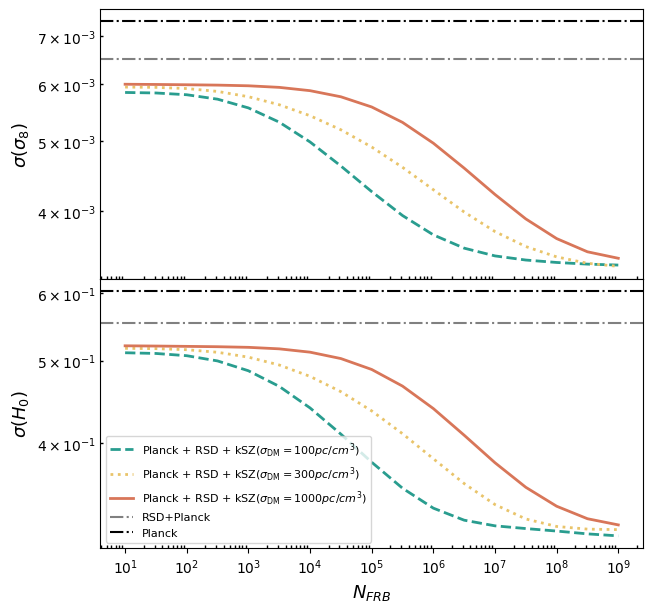

In [11]:
err_planck_om = np.sqrt(planck_cov[6,6])
err_planck_rsd_om = np.sqrt(planck_rsd_cov[6,6])
err_planck_sig8 = np.sqrt(planck_cov[7,7])
err_planck_rsd_sig8 = np.sqrt(planck_rsd_cov[7,7])
err_planck_s8 = np.sqrt(planck_cov[8,8])
err_planck_rsd_s8 = np.sqrt(planck_rsd_cov[8,8])
err_planck_h0 = np.sqrt(planck_cov[9,9])
err_planck_rsd_h0 = np.sqrt(planck_rsd_cov[9,9])

Nfrb = np.logspace(1, 9, num=17, endpoint=True, base=10.0, dtype=None)

plt.clf()

fig,ax = plt.subplots(2,1,figsize=(7,7),sharex = "all")
fig.subplots_adjust(hspace = 0)

#ax[0].axhline(y=err_planck_om,label='Planck',c='black', linestyle='-.')
#ax[0].axhline(y=err_planck_rsd_om,label='Planck+RSD',c='grey', linestyle='-.')
#ax[0].plot(Nfrb,np.sqrt(err100_om_s),'--',c=c1,label=r'$Planck + RSD + kSZ\:tomography(\sigma_{D}=100$)',linewidth=2.0)
#ax[0].plot(Nfrb,np.sqrt(err300_om_s),':',c=c2,label=r'$Planck + RSD + kSZ\:tomography(\sigma_{D}=300$)',linewidth=2.0)
#ax[0].plot(Nfrb,np.sqrt(err1000_om_s),'-',c=c3,label=r'$Planck + RSD + kSZ\:tomography(\sigma_{D}=1000$)',linewidth=2.0)
#ax[0].set_ylabel(r'$ \sigma(\Omega_m) $',size=10)
#ax[0].set_yscale('log')
#ax[0].legend(fontsize=8,  loc='lower left')
#ax[0].minorticks_on()
#ax[0].tick_params(which='minor', direction='in', length=2, width=1)

ax[0].plot(Nfrb,np.sqrt(err100_sig8_s),'--',c=c1,label='Planck + RSD + ksz (100)',linewidth=2.0)
ax[0].plot(Nfrb,np.sqrt(err300_sig8_s),':',c=c2,label='Planck + RSD + ksz (300)',linewidth=2.0)
ax[0].plot(Nfrb,np.sqrt(err1000_sig8_s),'-',c=c3,label='Planck + RSD + ksz (1000)',linewidth=2.0)
ax[0].axhline(y=err_planck_rsd_sig8,label='RSD+Planck',c='grey', linestyle='-.')
ax[0].axhline(y=err_planck_sig8,label='Planck',c='black', linestyle='-.')
ax[0].set_ylabel(r'$ \sigma(\sigma_8) $',size=13)
ax[0].set_yscale('log')
ax[0].minorticks_on()
ax[0].tick_params(which='minor', direction='in', length=2, width=1)


#ax[2].plot(Nfrb,np.sqrt(err100_s8_s),'--',c=c1,label='Planck + RSD + ksz tomography(100)',linewidth=2.0)
#ax[2].plot(Nfrb,np.sqrt(err300_s8_s),':',c=c2,label='Planck + RSD + ksz tomography(300)',linewidth=2.0)
#ax[2].plot(Nfrb,np.sqrt(err1000_s8_s),'-',c=c3,label='Planck + RSD + ksz tomography(1000)',linewidth=2.0)
#ax[2].axhline(y=err_planck_rsd_s8,label='RSD+Planck',c='grey', linestyle='-.')
#ax[2].axhline(y=err_planck_s8,label='Planck',c='black', linestyle='-.')
#ax[2].set_ylabel(r'$ \sigma(S_8) $',size=13)
#ax[2].set_yscale('log')
#ax[2].minorticks_on()
#ax[2].tick_params(which='minor', direction='in', length=2, width=1)

ax[1].plot(Nfrb,np.sqrt(err100_h0_s),'--',c=c1,label=r'$\text{Planck + RSD + kSZ}(\sigma_\text{DM}=100pc/cm^3)$',linewidth=2.0)
ax[1].plot(Nfrb,np.sqrt(err300_h0_s),':',c=c2,label=r'$\text{Planck + RSD + kSZ} (\sigma_\text{DM}=300pc/cm^3)$',linewidth=2.0)
ax[1].plot(Nfrb,np.sqrt(err1000_h0_s),'-',c=c3,label=r'$\text{Planck + RSD + kSZ} (\sigma_\text{DM}=1000pc/cm^3)$',linewidth=2.0)
ax[1].axhline(y=err_planck_rsd_h0,label='RSD+Planck',c='grey', linestyle='-.')
ax[1].axhline(y=err_planck_h0,label='Planck',c='black', linestyle='-.')
ax[1].set_xlabel(r'$ N_{FRB} $',size=13)
ax[1].set_ylabel(r'$ \sigma(H_0) $',size=13)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].minorticks_on()
ax[1].tick_params(which='minor', direction='in', length=2, width=1)
ax[1].legend(fontsize=8,  loc='lower left')

pdf_path = os.path.join('/home/wangsy/get_prior/finalv4/figure', 'cdm.pdf')
plt.savefig(pdf_path , bbox_inches='tight')

### wcdm

In [ ]:
# mcmc/wcdm/rsd_ksz.ipynb(get fisher)  ----   plot/plot.ipynb(courter) ---- wcdm_use.pdf